# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: ADIL LATIF HABIBI  
- Email: adillatif845@gmail.com
- Id Dicoding: alhabibi

## 1. Persiapan

### 1.1. Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import lightgbm as lgb
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tkinter import *

%matplotlib inline
warnings.filterwarnings("ignore")

### 1.2. Menyiapkan data yang akan diguankan

In [2]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
df = pd.read_csv(url, sep=';')
pd.set_option('display.max_columns', None)

### 1.3. Mengecek sample, jumlah baris data, info, dan statistik dataset yang digunakan

In [3]:
display(df)
display(df.sample(5))
display(df.shape)
display(df.info())
display(df.describe())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
3464,1,17,3,9070,1,1,120.0,1,3,1,4,4,116.9,1,0,0,1,0,0,19,0,0,6,6,6,13.500000,0,0,6,7,6,13.428571,0,8.9,1.4,3.51,Graduate
576,1,1,2,9500,1,1,149.0,1,3,1,9,9,137.5,0,0,0,1,1,0,19,0,0,8,8,7,13.828571,0,0,8,8,7,13.828571,0,12.7,3.7,-1.70,Graduate
3830,1,1,3,9500,1,1,143.0,1,1,1,4,4,129.0,1,0,0,1,1,0,18,0,0,8,8,7,12.365714,0,0,8,8,7,12.365714,0,10.8,1.4,1.74,Graduate
4269,1,17,2,9070,1,1,142.0,1,3,1,2,4,141.0,1,0,0,1,1,0,18,0,0,6,6,6,13.000000,0,0,6,8,1,10.000000,0,10.8,1.4,1.74,Enrolled
507,1,1,2,9773,1,1,138.0,1,19,1,9,3,133.5,1,0,0,1,0,0,18,0,0,6,6,6,12.666667,0,0,6,6,6,13.666667,0,12.7,3.7,-1.70,Graduate


(4424, 37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

None

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


*Insight : Terdapat beberapa kolom yang seharusnya merupakan kategori tetapi terbaca sebagai numeric, ini harus dilakukan perubahan agar pemahaman terhadap data menjadi benar.*

## 2. Data Understanding

2.1 Detail Variabel yang digunakan

![Deskripsi teks](pic\1.png)
![Deskripsi teks](pic\2.png)
![Deskripsi teks](pic\3.png)
![Deskripsi teks](pic\4.png)
![Deskripsi teks](pic\5.png)

Agar lebih mudah untuk memahami data kita akan :
- Melakukan duplikat pada dataset untuk berjaga jika terjadi perubahan yang tidak diinginkan.
- Mengecek dan mengubah tipe data pada beberapa kolom menjadi tipe data yang sesuai karena terdapat kolom yang seharusnya adalah kategorikal tetapi saat ini bertipe numerik

### 2.1. Duplikasi Dataset 

In [4]:
dfn = df.copy(deep=True)

### 2.2. Mengubah tipe data menjadi kategorikal

In [5]:
categorical_columns = ['Marital_status', 
                       'Application_mode', 
                       'Course', 
                       'Daytime_evening_attendance',
                       'Previous_qualification',
                       'Nacionality', 
                       'Mothers_qualification',
                       'Fathers_qualification',
                       'Mothers_occupation',
                       'Fathers_occupation',
                       'Displaced',
                       'Educational_special_needs',
                       'Debtor',
                       'Tuition_fees_up_to_date',
                       'Gender',
                       'Scholarship_holder',
                       'International',
                       'Status']

dfn[categorical_columns] = dfn[categorical_columns].astype('category')

In [6]:
dfn.dtypes

Marital_status                                  category
Application_mode                                category
Application_order                                  int64
Course                                          category
Daytime_evening_attendance                      category
Previous_qualification                          category
Previous_qualification_grade                     float64
Nacionality                                     category
Mothers_qualification                           category
Fathers_qualification                           category
Mothers_occupation                              category
Fathers_occupation                              category
Admission_grade                                  float64
Displaced                                       category
Educational_special_needs                       category
Debtor                                          category
Tuition_fees_up_to_date                         category
Gender                         

Menyimpan dataframe yang tipe datanya sudah diperbaiki untuk visualisasi Tableau

In [7]:
dfn.to_excel('dfn_tableau.xlsx', index=False)

### 2.3 Visualisasi Data Kategorikal

In [8]:
for column in dfn[categorical_columns]:
    print(dfn[column].value_counts())
    print('*'*30)

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
******************************
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
27       1
57       1
Name: count, dtype: int64
******************************
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
******************************
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
******************************
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
14       1
5        1
Name: count, d

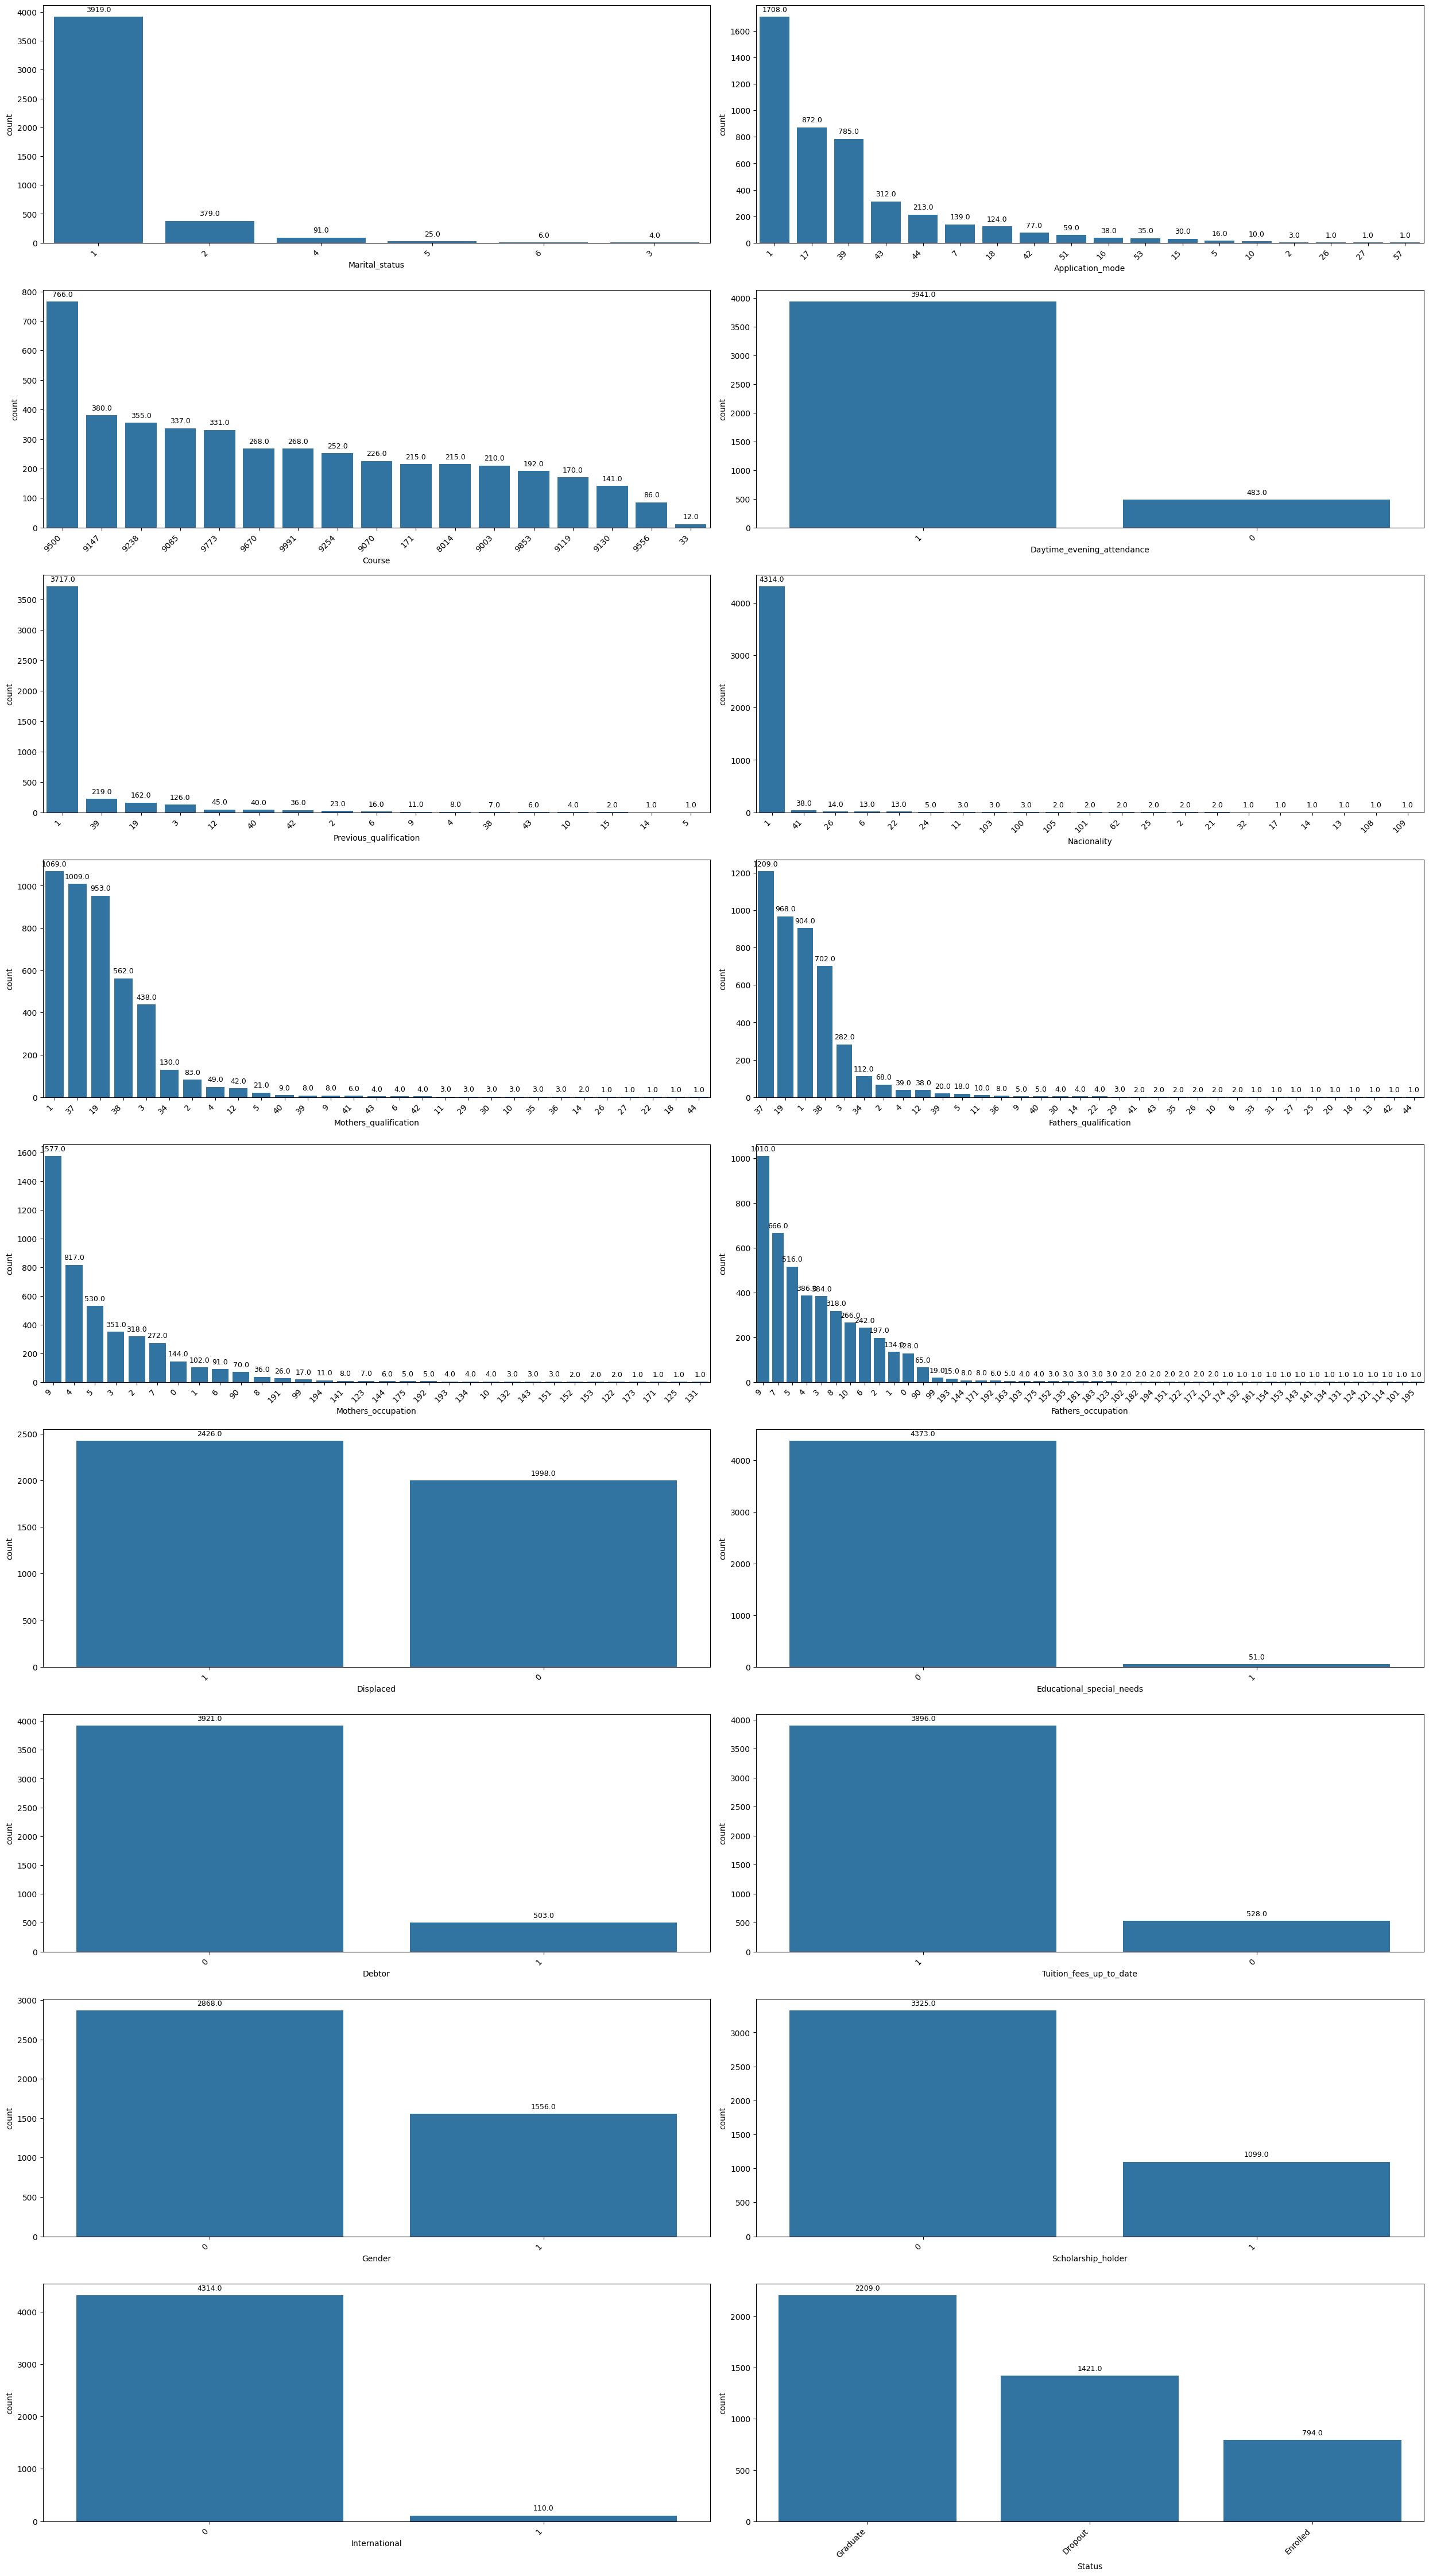

In [10]:
fig, ax = plt.subplots(9,2, figsize=(25, 45))

for i, feature in enumerate(categorical_columns):
    row = i // 2
    col = i % 2

    order = dfn[feature].value_counts().index

    sns.countplot(data=dfn, x=feature, order=order, ax=ax[row,col])

    for p in ax[row, col].patches:
        ax[row, col].annotate(f'{p.get_height()}',  # teks label
                             (p.get_x() + p.get_width() / 2., p.get_height()),  # posisi
                             ha = 'center', va = 'center', 
                             xytext = (0, 9), 
                             textcoords = 'offset points',
                             fontsize=9)

    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha='right')

if len(categorical_columns) % 2 != 0:
    ax[rows-1, 1].axis('off')

plt.tight_layout()
plt.show()

Dari visualisasi diatas banyak insight yang bisa didapatkan seperti kategori terbanyak dari setiap fitur pada dataset yaitu  :
- Mayoritas siswa berstatus Single (1) dengan jumlah : 3919 siswa
- Mayoritas application yang digunakan siswa adalah 1st Phase-General Contingent (1) dengan jumlah : 1708
- Kursus yang paling banyak diambil siswa adalah Nursing (9500) dengan jumlah siswa : 766
- Kebanyakan siswa mengambil menghadiri/mengambil kelas siang
- Kualifikasi h mahasiswa sebelum mendaftar ke pendidikan tinggi yang paling banyak adalah Secondary education (1) dengan jumlah sebanyak 3717 siswa
- Kebanyakan siswa berkebangsaan Portugis dengan jumlah sebanyak 4314 (1) siswa
- Kualifikasi ibu siswa kebanyakan adalah Secondary Education (1) dengan jumlah 1069 orang diikuti dengan Basic education 1st cycle (4th/5th year) or equiv (37) berjumlah 1009 orang
- Kualifikasi ayah siswa kebanyakan adalah Basic education 1st cycle (4th/5th year) or equiv (37) berjumlah 1209 orang 
- Sebanyak 1577 ibu siswa adalah Unskilled Workers (9)
- Sebanyak 1010 ayah siswa adalah Unskilled Workers (9)
- Sebanyak 2426 siswa berasal dari anak terlantar/displaced person (1)
- Hanya 51 orang siswa yang merupakan siswa berkebutuhan khusus (1), sisanya sebanyak 4373 orang siswa bukanlah siswa berkebutuhan khusus (0)
- Kebanyakan dari siswa yaitu 3921 orang tidak memiliki utang/tunggakan (0)
- Kebanyakan siswa yaitu sebanyak 3896 orang siswa sudah membayar biaya kuliah (1)
- Kebanyakan siswa adalah perempuan (0) yang berjumlah 2868 orang, sisanya laki-laki (1) yang  berjumlah 1556 orang
- Sebanyak 1099 siswa adalah penerima beasiswa (1), sedangkan mayoritas sebanyak 3325 orang siswa bukanlah menerima beasiswa (0) 
- Sebanyak 110 (1) orang adalah siswa international, sedangkan 4314 lainnya bukanlah siswa international (0)
- Terdapat 2209 orang siswa yang lulus/graduate dan sisanya sebanyak 1421 orang Drop Out serta 794 orang berstatus "enrolled"

*Karena akan dilakukan analisis dan prediksi apakah siswa Drop Out atau Graduate, maka siswa yang memiliki status "Enrolled" akan dihapus dari dataset.*

- Menghapus baris yang memiliki berisi 'enrolled' pada dataset

In [11]:
dfn = dfn.query("Status != 'Enrolled'")
dfn['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled       0
Name: count, dtype: int64

In [12]:
dfn['Status'] = dfn['Status'].astype(str)
dfn = dfn.query("Status != 'Enrolled'")
dfn['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [13]:
dfn['Status'] = dfn['Status'].replace({
    1:'Graduate',
    0: 'Dropout'
})

### 2.4. Visualisasi Data Numerical

In [14]:
numerical_column = dfn.select_dtypes(include=['int64', 'float']).columns.tolist()
numerical_column

['Application_order',
 'Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [15]:
def plot_countplot_numerical_grid(data, hue_col, numerical_column):
    num_plots = len(numerical_column)
    num_rows = 13
    num_cols = num_plots // num_rows + 1

    plt.figure(figsize=(15, 50))

    for i, col in enumerate(numerical_column, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(x=col, hue=hue_col, data=data)
        plt.title(f"{col}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    plot_countplot_numerical_grid(dfn, 'Status', numerical_column)

### 2.5. Visualisasi hubungan antar fitur kategorical dengan Status siswa 

In [16]:
dfn['Status'] = dfn['Status'].replace({
    1:'Graduate',
    0: 'Dropout'
})

In [17]:
def plot_countplot_categorical_grid(data, hue_col, categorical_columns):
    num_plots = len(categorical_columns)
    num_rows = 9
    num_cols = (num_plots - 1) // num_rows + 1

    plt.figure(figsize=(25, 45))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(x=col, hue=hue_col, data=data)
        plt.title(f"{col}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

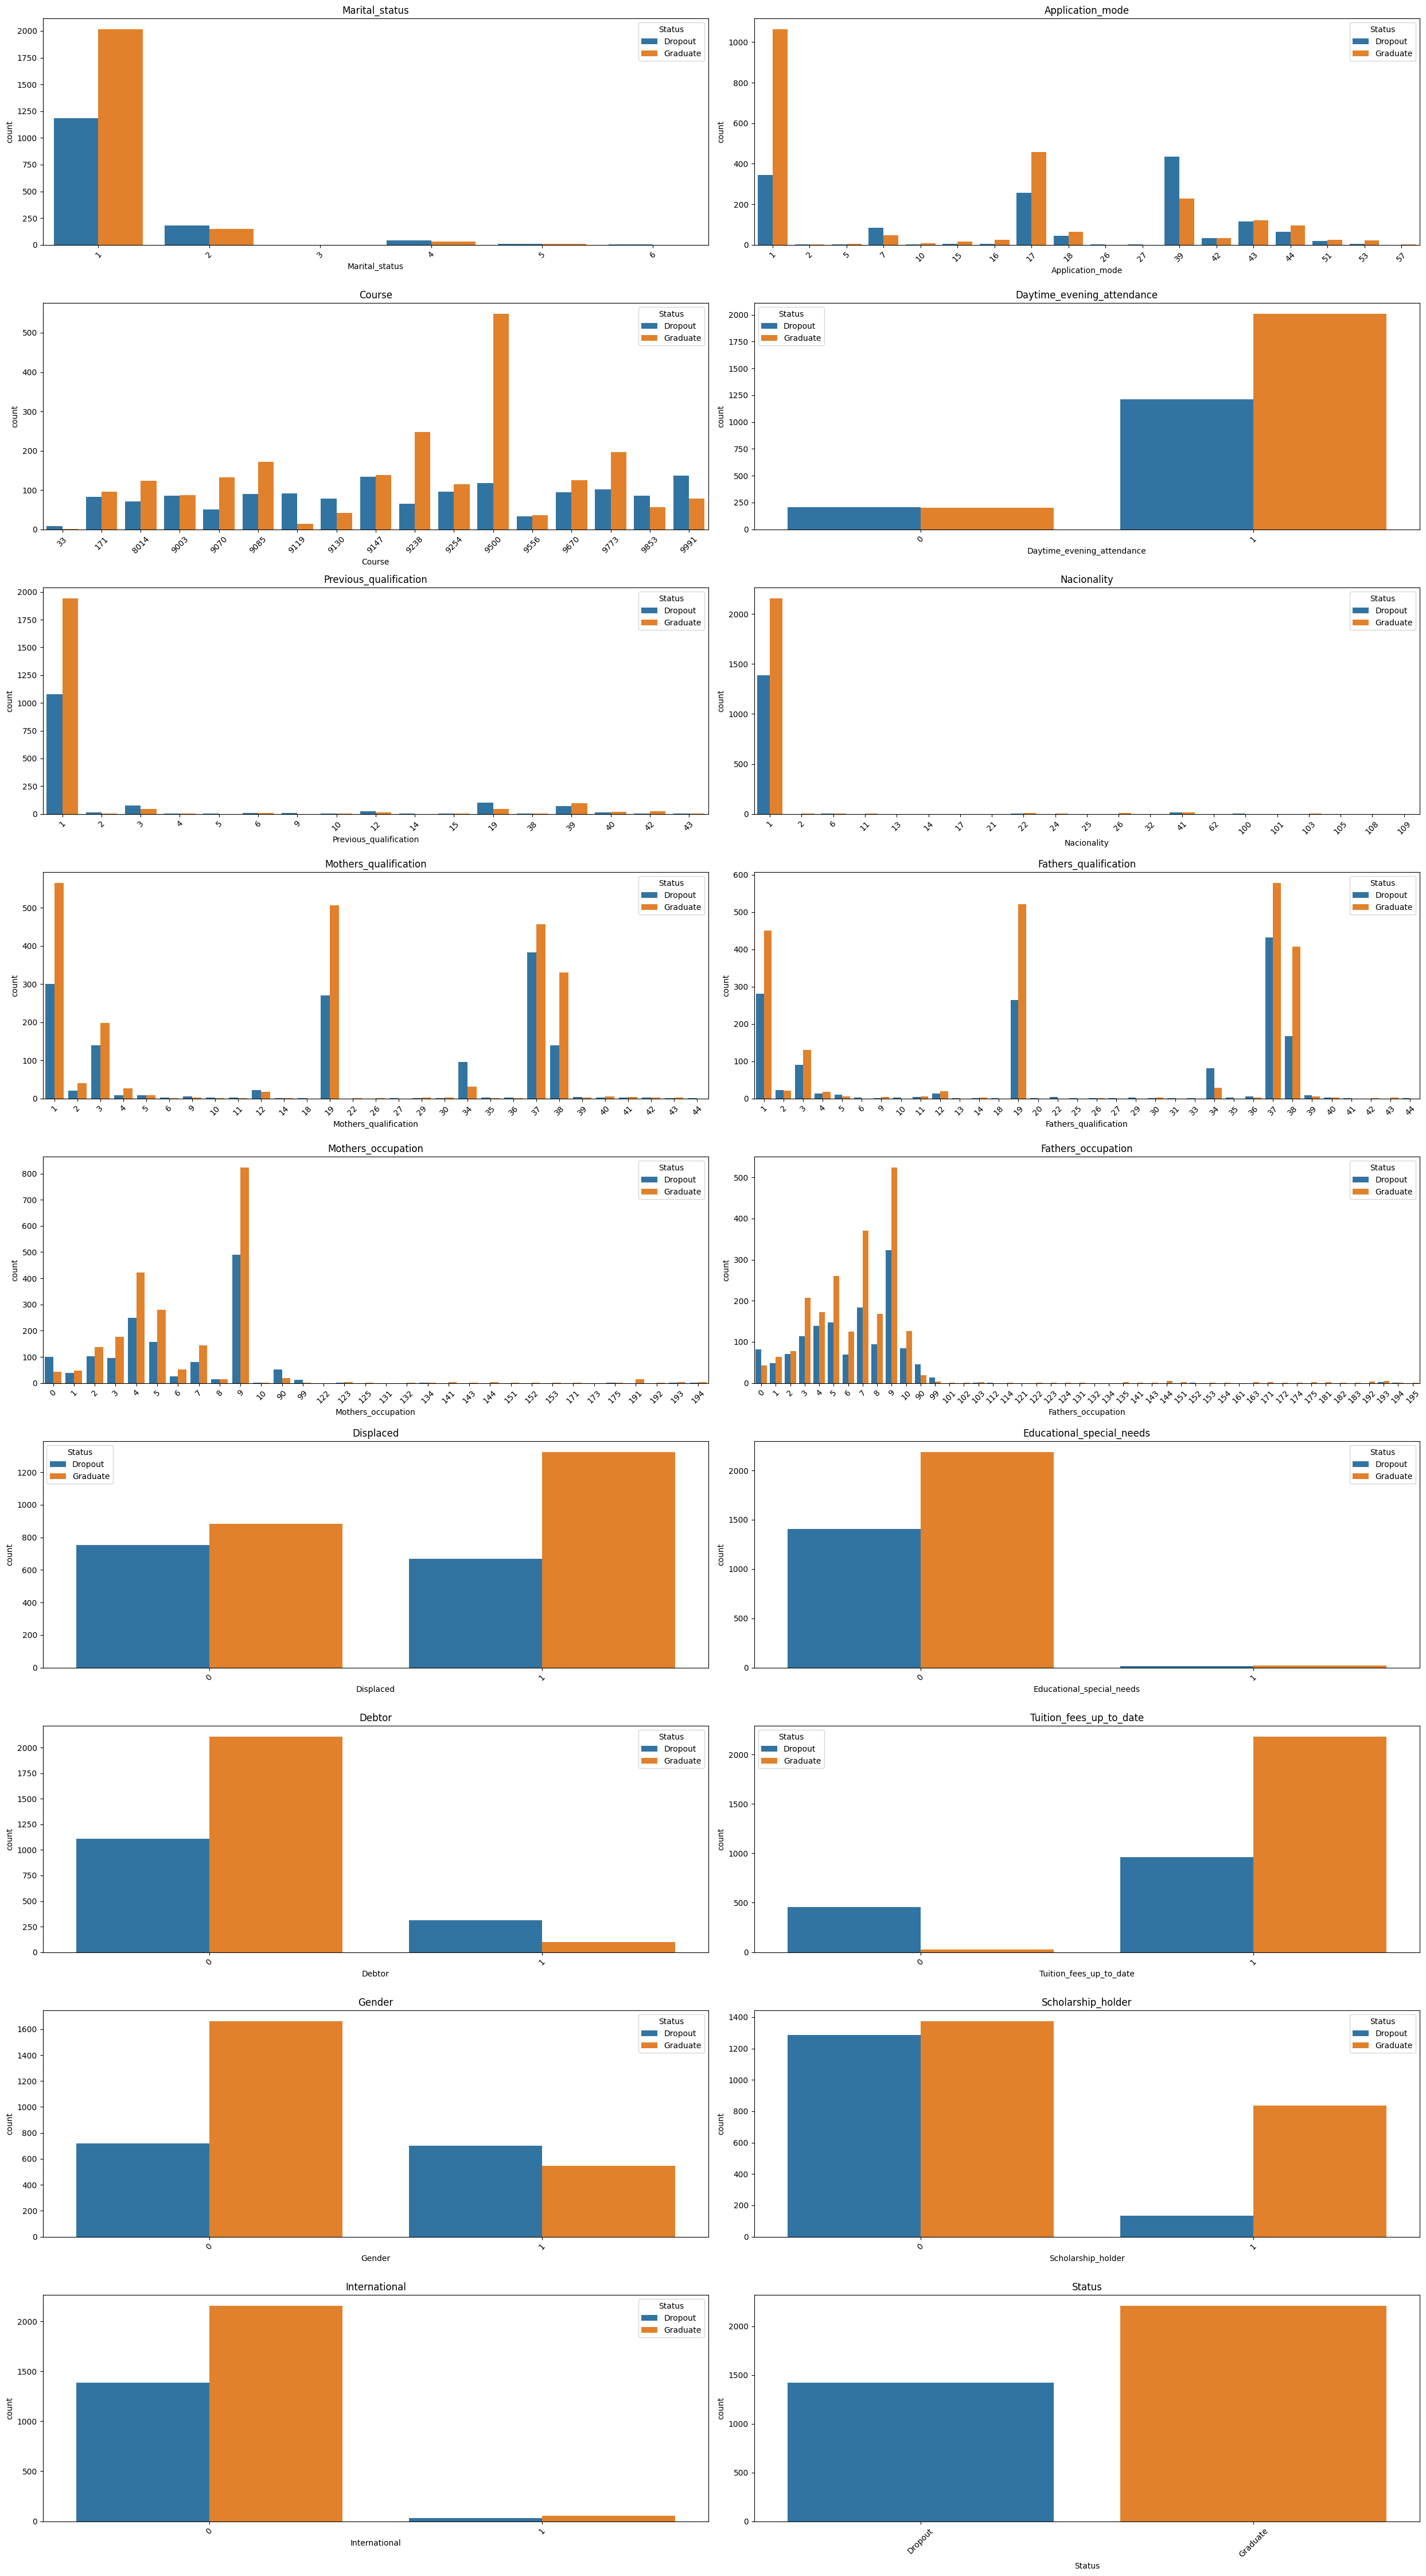

In [18]:
plot_countplot_categorical_grid(dfn, 'Status', categorical_columns)

## Data Preparation / Preprocessing

### Cek missing value

In [19]:
dfn.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Cek data Duplikat

In [20]:
print(f'Jumlah data duplikat adalah : {dfn.duplicated().sum()}')

Jumlah data duplikat adalah : 0


### Seleksi Fitur

In [21]:
dfn['Status'] = dfn['Status'].replace({
    'Graduate':1,
    'Dropout': 0
})

dfn.corr()['Status'].sort_values(ascending=False)

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Application_order                               0.094355
Daytime_evening_attendance                      0.084496
Curricular_units_1st_sem_evaluations            0.059786
Curricular_units_2nd_sem_credited               0.052402
GDP                            

- Terlihat bahwa terdapat korelasi negatif antara beberapa fitur dengan status siswa. Nilai positif atau negatif pada korelasi pearson bukan menunjukkan kuat atau lemahnya suatu hubungan, melainkan  hanya menunjukkan adanya korelasi yang berbanding terbalik
- Korelasi pearson memiliki rentang antara -1 hingga 1, dimana semakin mendekati angka 0 berarti korelasi antara variabel semakin lemah.

- Jika nilai-nilainya diganti menjadi nilai absolut, maka urutan korelasi fitur yang paling berpengaruh terhadap 'Status' akan terlihat lebih jelas

In [22]:
corr = dfn.corr()['Status'].abs().sort_values(ascending=False)
corr

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Age_at_enrollment                               0.267229
Debtor                                          0.267207
Gender                                          0.251955
Application_mode                                0.244507
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Curricular_units_2nd_sem_withou

- Untuk melakukan prediksi apakah siswa Graduate atau Dropout, akan diambil fitur yang hanya memiliki korelasi tinggi dengan fitur Status.  Disiini definisi tinggai adalah jika nilai korelasinya lebih dari 0.6

- Membuat dataframe baru berisi fitur yang memiliki korelasi diatas 0.6 dengan Fitur Status

In [23]:
dff = dfn[[
    'Status',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Age_at_enrollment',
    'Debtor',
    'Gender',
    'Application_mode',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_1st_sem_enrolled',
    'Admission_grade',
    'Displaced',
    'Curricular_units_2nd_sem_evaluations',
    'Previous_qualification_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Marital_status',
    'Application_order',
    'Daytime_evening_attendance',
    'Curricular_units_1st_sem_without_evaluations',
    'Previous_qualification'
]]
dff

,Status,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Gender,Application_mode,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Admission_grade,Displaced,Curricular_units_2nd_sem_evaluations,Previous_qualification_grade,Curricular_units_2nd_sem_without_evaluations,Marital_status,Application_order,Daytime_evening_attendance,Curricular_units_1st_sem_without_evaluations,Previous_qualification
0,0,0,0.000000,0,0.000000,1,0,20,0,1,17,0,0,127.3,1,0,122.0,0,1,5,1,0,1
1,1,6,13.666667,6,14.000000,0,0,19,0,1,15,6,6,142.5,1,6,160.0,0,1,1,1,0,1
2,0,0,0.000000,0,0.000000,0,0,19,0,1,1,6,6,124.8,1,0,122.0,0,1,5,1,0,1
3,1,5,12.400000,6,13.428571,1,0,20,0,0,17,6,6,119.6,1,10,122.0,0,1,2,1,0,1
4,1,6,13.000000,5,12.333333,1,0,45,0,0,39,6,6,141.5,0,6,100.0,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,5,12.666667,5,13.600000,1,0,19,0,1,1,6,6,122.2,0,8,125.0,0,1,6,1,0,1
4420,0,2,11.000000,6,12.000000,0,0,18,1,0,1,6,6,119.0,1,6,120.0,0,1,2,1,0,1
4421,0,1,13.500000,7,14.912500,1,1,30,0,0,1,8,7,149.5,1,9,154.0,0,1,1,1,0,1
4422,1,5,12.000000,5,13.800000,1,1,20,0,0,1,5,5,153.8,1,6,180.0,0,1,1,1,0,1


In [24]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Status                                        3630 non-null   int64   
 1   Curricular_units_2nd_sem_approved             3630 non-null   int64   
 2   Curricular_units_2nd_sem_grade                3630 non-null   float64 
 3   Curricular_units_1st_sem_approved             3630 non-null   int64   
 4   Curricular_units_1st_sem_grade                3630 non-null   float64 
 5   Tuition_fees_up_to_date                       3630 non-null   category
 6   Scholarship_holder                            3630 non-null   category
 7   Age_at_enrollment                             3630 non-null   int64   
 8   Debtor                                        3630 non-null   category
 9   Gender                                        3630 non-nu

In [26]:
encoding_cols=['Tuition_fees_up_to_date',
               'Scholarship_holder',
               'Debtor',
               'Gender',
               'Application_mode',
               'Displaced',
               'Marital_status',
               'Daytime_evening_attendance',
               'Previous_qualification']

label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    dff[column] = label_encoders[column].fit_transform(dff[column])

In [27]:
dff = dff[[
    'Status',
    'Marital_status',
    'Application_mode',
    'Application_order',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Previous_qualification_grade',
    'Admission_grade',
    'Displaced',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations']]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Status                                        3630 non-null   int64  
 1   Marital_status                                3630 non-null   int64  
 2   Application_mode                              3630 non-null   int64  
 3   Application_order                             3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Admission_grade                               3630 non-null   float64
 8   Displaced                                     3630 non-null   int64  
 9   Debtor                                        3630 non-null   int64 

Menyimpan Dataset Final Untuk Dashboard Prediksi

In [ ]:
dff.to_csv('dff.csv', index=False)

## Modeling

In [ ]:
X = dff.drop(['Status'], axis=1)
y = dff['Status'].values

In [ ]:
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X, y = rus.fit_resample(X,y)
print(Counter(y))

Counter({1: 2209, 0: 1421})
Counter({0: 2209, 1: 2209})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
lgb = lgb.LGBMClassifier()
xgb = xgb.XGBClassifier()
svm = SVC()

In [ ]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
dtc.fit(X_train, y_train)
lgb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1745, number of negative: 1789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 3534, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493775 -> initscore=-0.024902
[LightGBM] [Info] Start training from score -0.024902


SVC()

## Evaluation

In [ ]:
print('Skor akurasi Random Forest adalah : ', rf.score(X_train, y_train))
print('Skor akurasi Logistic Regression adalah : ', lr.score(X_train, y_train))
print('Skor akurasi Decision Tree adalah : ', dtc.score(X_train, y_train))
print('Skor akurasi LightGBM  adalah : ', lgb.score(X_train, y_train))
print('Skor akurasi XGBoost adalah : ', xgb.score(X_train, y_train))
print('Skor akurasi SVM adalah : ', svm.score(X_train, y_train))

Skor akurasi Random Forest adalah :  1.0
Skor akurasi Logistic Regression adalah :  0.8893604980192417
Skor akurasi Decision Tree adalah :  1.0
Skor akurasi LightGBM  adalah :  0.9895302773061686
Skor akurasi XGBoost adalah :  0.99830220713073
Skor akurasi SVM adalah :  0.8279569892473119


#### Menilai hasil Prediksi Menggunakan Data Test 

In [ ]:
rf_prediction = rf.predict(X_test)
print("Accuracy Score Random Forest pada data test -", accuracy_score(y_test, rf_prediction))

lr_prediction = lr.predict(X_test)
print("Accuracy Score Logistic Regression pada data test -", accuracy_score(y_test, lr_prediction))

dtc_prediction = dtc.predict(X_test)
print("Accuracy Score Decision Tree pada data test -", accuracy_score(y_test, dtc_prediction))

lgb_prediction = lgb.predict(X_test)
print("Accuracy Score LightGBM pada data test -", accuracy_score(y_test, lgb_prediction))

xgb_prediction = xgb.predict(X_test)
print("Accuracy Score XGBoost pada data test -", accuracy_score(y_test, xgb_prediction))

svm_prediction = svm.predict(X_test)
print("Accuracy Score SVM pada data test -", accuracy_score(y_test, svm_prediction))

Accuracy Score Random Forest pada data test - 0.9434389140271493
Accuracy Score Logistic Regression pada data test - 0.8891402714932126
Accuracy Score Decision Tree pada data test - 0.8993212669683258
Accuracy Score LightGBM pada data test - 0.9343891402714932
Accuracy Score XGBoost pada data test - 0.9434389140271493
Accuracy Score SVM pada data test - 0.8416289592760181


#### Melakukan Train Pada Keseluruhan Data Menggunakan Algoritma Terbaik, Prediksi Data Dummy dan Menyimpan Model

In [ ]:
rf = rf.fit(X, y)
xgb = xgb.fit(X, y)
print('Skor akurasi Random Forest pada keseluruhan data adalah : ', rf.score(X, y))
print('Skor akurasi XGB pada keseluruhan data adalah : ', xgb.score(X, y))

Skor akurasi Random Forest pada keseluruhan data adalah :  1.0
Skor akurasi XGB pada keseluruhan data adalah :  0.9972838388411046


- Prediksi Menggunakan data Dummy
- Membuat Data Dummy

### Data Dummy Siswa 1 dan Siswa 2

In [ ]:
# mari kita buat permisalan data untuk siswa tersebut

siswa_1 = pd.DataFrame({
    'Marital_status': 1,
    'Application_mode': 17,
    'Application_order': 5,
    'Daytime_evening_attendance': 1,
    'Previous_qualification': 1,

    'Previous_qualification_grade': 122.0,
    'Admission_grade': 127.3,
    'Displaced': 1,
    'Debtor': 0,
    'Tuition_fees_up_to_date': 1,

    'Gender': 1,
    'Scholarship_holder': 0,
    'Age_at_enrollment': 20,

    'Curricular_units_1st_sem_enrolled': 0,
    'Curricular_units_1st_sem_approved': 0,
    'Curricular_units_1st_sem_grade': 0.0,
    'Curricular_units_1st_sem_without_evaluations': 0,
    
    'Curricular_units_2nd_sem_enrolled': 0,
    'Curricular_units_2nd_sem_evaluations': 0,
    'Curricular_units_2nd_sem_approved': 0,
    'Curricular_units_2nd_sem_grade': 0.0,
    'Curricular_units_2nd_sem_without_evaluations': 0,
}, index=[0])

siswa_2 = pd.DataFrame({
    'Marital_status': 1,
    'Application_mode': 1,
    'Application_order': 1,
    'Daytime_evening_attendance': 1,
    'Previous_qualification': 1,

     'Previous_qualification_grade': 148.0,
     'Admission_grade': 131.6,
     'Displaced': 1,
     'Debtor': 0,
     'Tuition_fees_up_to_date': 1,

     'Gender': 1,
    'Scholarship_holder': 0,
    'Age_at_enrollment': 19,

    'Curricular_units_1st_sem_enrolled': 12,
    'Curricular_units_1st_sem_approved': 11,
    'Curricular_units_1st_sem_grade': 12.0,  
    'Curricular_units_1st_sem_without_evaluations': 2,

    'Curricular_units_2nd_sem_enrolled': 12,
    'Curricular_units_2nd_sem_evaluations': 21,
    'Curricular_units_2nd_sem_approved': 12,
    'Curricular_units_2nd_sem_grade': 12.307692,
    'Curricular_units_2nd_sem_without_evaluations': 0,
}, index=[0])

In [ ]:
display(siswa_1.dtypes)
display(siswa_2.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Admission_grade                                 float64
Displaced                                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                            int64
Scholarship_holder                                int64
Age_at_enrollment                                 int64
Curricular_units_1st_sem_enrolled                 int64
Curricular_units_1st_sem_approved                 int64
Curricular_units_1st_sem_grade                  float64
Curricular_units_1st_sem_without_evaluations      int64
Curricular_units_2nd_sem_enrolled               

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Admission_grade                                 float64
Displaced                                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                            int64
Scholarship_holder                                int64
Age_at_enrollment                                 int64
Curricular_units_1st_sem_enrolled                 int64
Curricular_units_1st_sem_approved                 int64
Curricular_units_1st_sem_grade                  float64
Curricular_units_1st_sem_without_evaluations      int64
Curricular_units_2nd_sem_enrolled               

#### Prediksi 

- Siswa 1

In [ ]:
status = rf.predict(siswa_1)
status

if status == 1:
     print("Graduate")
else:
     print("Dropout")

Dropout


Siswa 2

In [ ]:
status = rf.predict(siswa_2)
status

if status == 1:
     print("Graduate")
else:
     print("Dropout")

Graduate


#### Simpan Model

In [ ]:
joblib.dump(rf, 'rf_model')

['rf_model']